
# **Setting up Pyspark in Colab**

To run spark in Colab, You need proper setup. Next cell will create required setup for running Spark/PySpark:

In [2]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

# Starting a spark session

In [3]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

# Creates a Spark session using the local[*] master
spark = SparkSession.builder.master("local[*]").getOrCreate()

# **Uploading CSV file into a dataframe**

In [4]:
# Upload files to google colab
from google.colab import files
uploaded = files.upload()

Saving BostonHousing.csv to BostonHousing.csv


In [5]:
# Reading this uploaded file and use this data frame.
file_path = "/content/BostonHousing.csv"
df = spark.read.format("csv").options(header="true", inferSchema="true").load(file_path)


# **Exploring dataframe**

In [6]:
# Show the first five rows
df.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [7]:
# We cant see directly last 5 rows like R, for that first we need to convert to pandas dataframe.
# Then in pandas we can use .tail function to see last rows.

# Convert the PySpark DataFrame to a Pandas DataFrame
pandas_df = df.toPandas()

# Display the last 5 rows in tabular format
print(pandas_df.tail(5))

        crim   zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
501  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273     21.0   
502  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273     21.0   
503  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273     21.0   
504  0.10959  0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273     21.0   
505  0.04741  0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273     21.0   

          b  lstat  medv  
501  391.99   9.67  22.4  
502  396.90   9.08  20.6  
503  396.90   5.64  23.9  
504  393.45   6.48  22.0  
505  396.90   7.88  11.9  


In [8]:
# Show the last five rows
df.tail(5)

[Row(crim=0.06263, zn=0.0, indus=11.93, chas=0, nox=0.573, rm=6.593, age=69.1, dis=2.4786, rad=1, tax=273, ptratio=21.0, b=391.99, lstat=9.67, medv=22.4),
 Row(crim=0.04527, zn=0.0, indus=11.93, chas=0, nox=0.573, rm=6.12, age=76.7, dis=2.2875, rad=1, tax=273, ptratio=21.0, b=396.9, lstat=9.08, medv=20.6),
 Row(crim=0.06076, zn=0.0, indus=11.93, chas=0, nox=0.573, rm=6.976, age=91.0, dis=2.1675, rad=1, tax=273, ptratio=21.0, b=396.9, lstat=5.64, medv=23.9),
 Row(crim=0.10959, zn=0.0, indus=11.93, chas=0, nox=0.573, rm=6.794, age=89.3, dis=2.3889, rad=1, tax=273, ptratio=21.0, b=393.45, lstat=6.48, medv=22.0),
 Row(crim=0.04741, zn=0.0, indus=11.93, chas=0, nox=0.573, rm=6.03, age=80.8, dis=2.505, rad=1, tax=273, ptratio=21.0, b=396.9, lstat=7.88, medv=11.9)]

In [9]:
# The schema provides information about the structure and data types of the columns in the DataFrame.
# Column name: Data type ( whether the column allows null values : true or false)
df.printSchema()

root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- b: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [10]:
# Summary of our columns
df.describe().show()

+-------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|summary|              crim|                zn|             indus|              chas|                nox|                rm|               age|              dis|              rad|               tax|           ptratio|                 b|             lstat|              medv|
+-------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|  count|               506|               506|               506|               506|                506|               506|               506|              506|              

In [11]:
# Counting number of rows in our dataset
df.count()

506

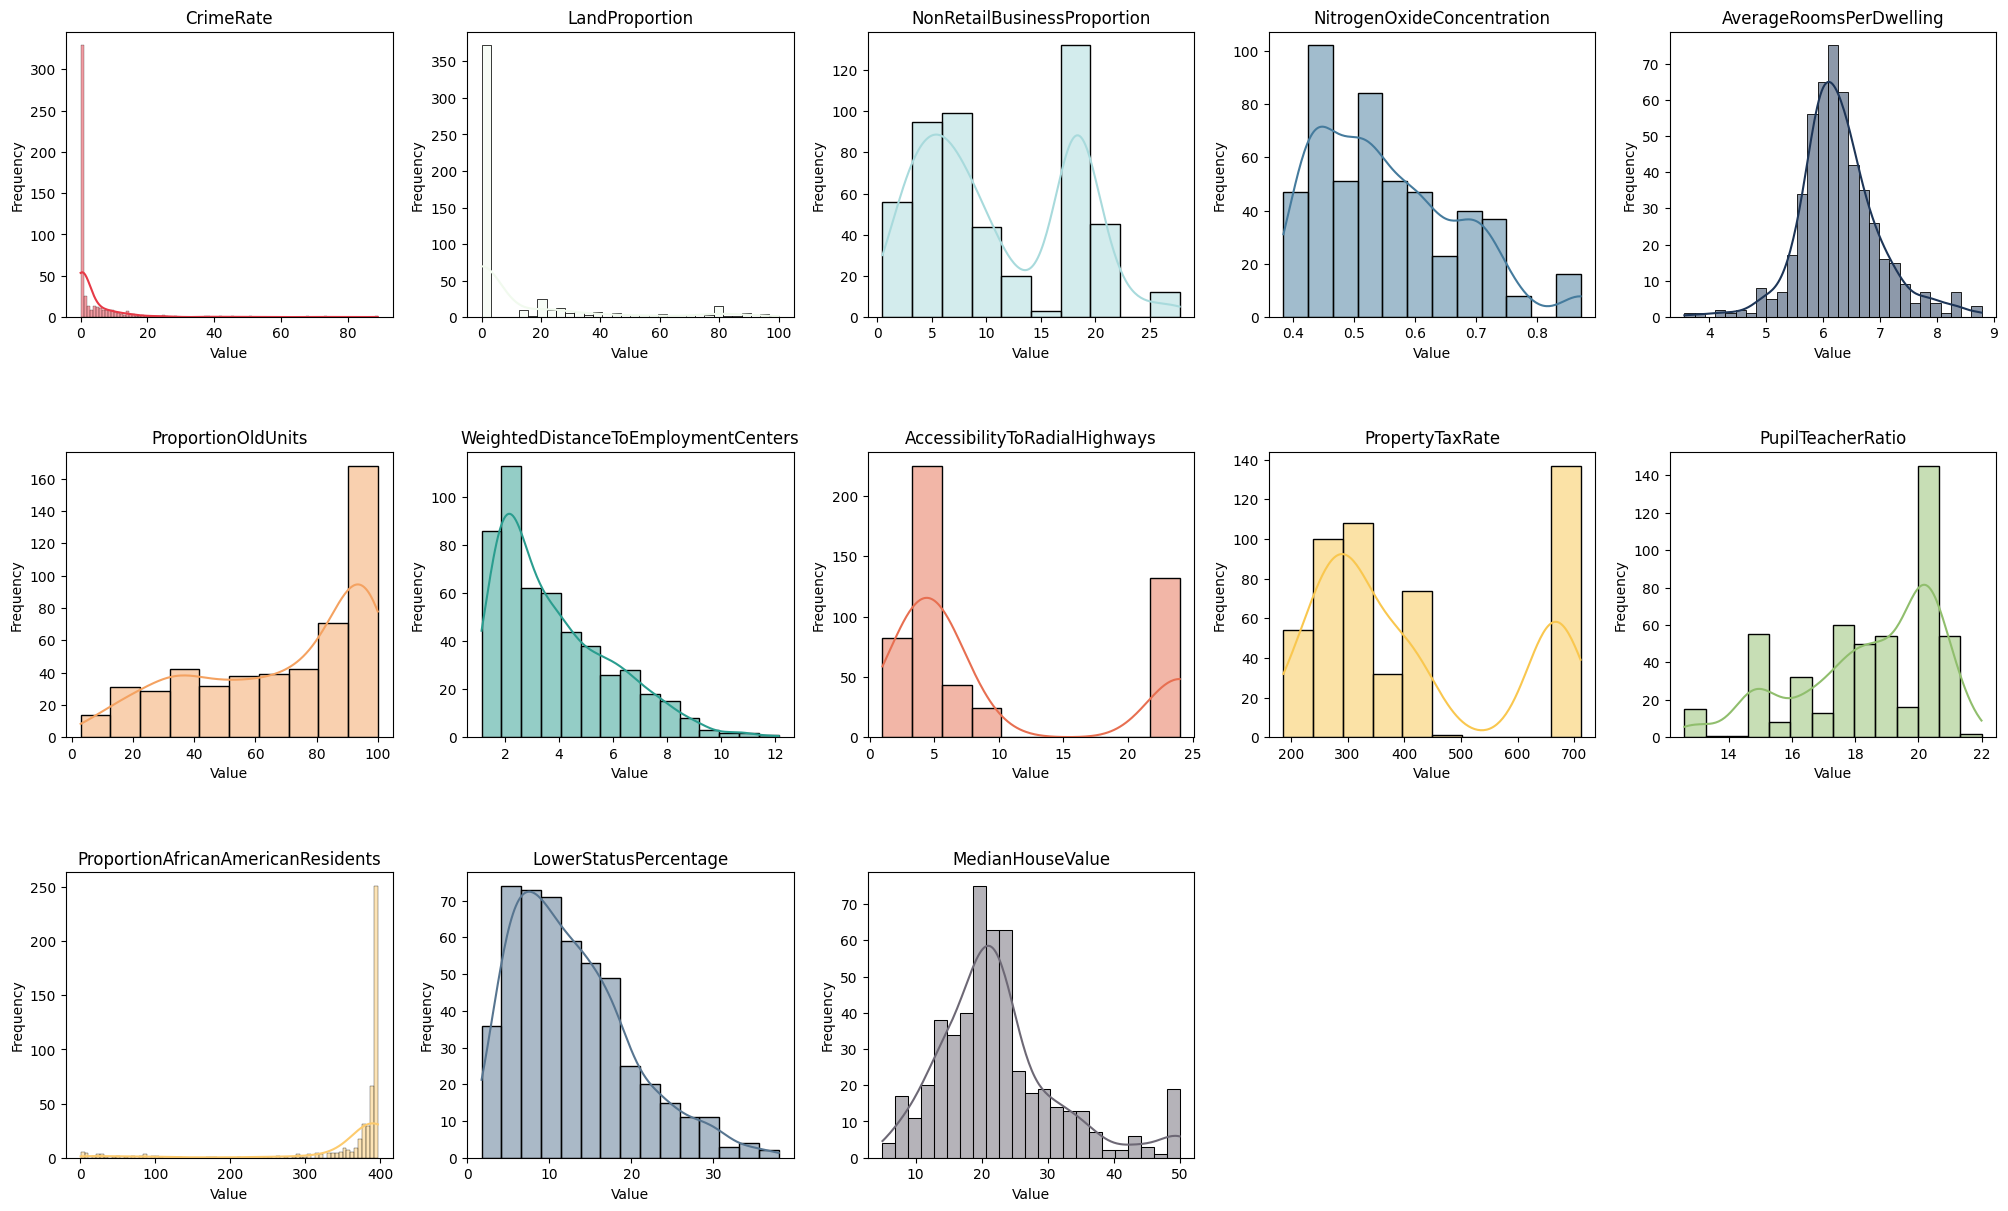

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# List of numeric column names to compute correlation for
numeric_columns = ["CrimeRate", "LandProportion", "NonRetailBusinessProportion", "NitrogenOxideConcentration", "AverageRoomsPerDwelling",
                   "ProportionOldUnits", "WeightedDistanceToEmploymentCenters", "AccessibilityToRadialHighways", "PropertyTaxRate",
                   "PupilTeacherRatio", "ProportionAfricanAmericanResidents", "LowerStatusPercentage", "MedianHouseValue"]

# Define custom colors for each field
custom_colors = ['#E63946', '#F1FAEE', '#A8DADC', '#457B9D', '#1D3557',
                 '#F4A261', '#2A9D8F', '#E76F51', '#F9C74F', '#90BE6D',
                 '#FDCB6E', '#577590', '#6D6875']

# Calculate the number of rows and columns needed for the subplots
num_columns = len(numeric_columns)
num_rows = (num_columns + 2) // 3  # 3 plots in each row
num_cols = min(num_columns, 5)  # 5 plots in each column

# Create subplots
fig, axs = plt.subplots(ncols=num_cols, nrows=num_rows, figsize=(20, 20))
axs = axs.flatten()

# Loop through numeric columns and create histograms with custom colors
for index, column in enumerate(numeric_columns):
    if index < len(axs):
        sns.histplot(data=df.toPandas(), x=column, ax=axs[index], kde=True, color=custom_colors[index])
        axs[index].set_title(column)
        axs[index].set_xlabel("Value")
        axs[index].set_ylabel("Frequency")

# Remove empty subplots
for i in range(num_columns, len(axs)):
    fig.delaxes(axs[i])

# Adjust subplot layout
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()


# **Data Cleaning and Transformation**

In [12]:
# Rename the columns
df = df.withColumnRenamed("crim", "CrimeRate") \
       .withColumnRenamed("zn", "LandProportion") \
       .withColumnRenamed("indus", "NonRetailBusinessProportion") \
       .withColumnRenamed("chas", "IsNearCharlesRiver") \
       .withColumnRenamed("nox", "NitrogenOxideConcentration") \
       .withColumnRenamed("rm", "AverageRoomsPerDwelling") \
       .withColumnRenamed("age", "ProportionOldUnits") \
       .withColumnRenamed("dis", "WeightedDistanceToEmploymentCenters") \
       .withColumnRenamed("rad", "AccessibilityToRadialHighways") \
       .withColumnRenamed("tax", "PropertyTaxRate") \
       .withColumnRenamed("ptratio", "PupilTeacherRatio") \
       .withColumnRenamed("b", "ProportionAfricanAmericanResidents") \
       .withColumnRenamed("lstat", "LowerStatusPercentage") \
       .withColumnRenamed("medv", "MedianHouseValue")

df.printSchema()

root
 |-- CrimeRate: double (nullable = true)
 |-- LandProportion: double (nullable = true)
 |-- NonRetailBusinessProportion: double (nullable = true)
 |-- IsNearCharlesRiver: integer (nullable = true)
 |-- NitrogenOxideConcentration: double (nullable = true)
 |-- AverageRoomsPerDwelling: double (nullable = true)
 |-- ProportionOldUnits: double (nullable = true)
 |-- WeightedDistanceToEmploymentCenters: double (nullable = true)
 |-- AccessibilityToRadialHighways: integer (nullable = true)
 |-- PropertyTaxRate: integer (nullable = true)
 |-- PupilTeacherRatio: double (nullable = true)
 |-- ProportionAfricanAmericanResidents: double (nullable = true)
 |-- LowerStatusPercentage: double (nullable = true)
 |-- MedianHouseValue: double (nullable = true)



In [13]:
from pyspark.sql.functions import col

# Create a list of column names
column_names = df.columns

# Create a dictionary to store the null counts for each column
null_counts = {}

# Calculate the count of null values for each column
for column in column_names:
    null_count = df.filter(col(column).isNull()).count()
    null_counts[column] = null_count

# Display the null counts for each column
for column, count in null_counts.items():
    print(f" '{column}': {count} null values")

 'CrimeRate': 0 null values
 'LandProportion': 0 null values
 'NonRetailBusinessProportion': 0 null values
 'IsNearCharlesRiver': 0 null values
 'NitrogenOxideConcentration': 0 null values
 'AverageRoomsPerDwelling': 0 null values
 'ProportionOldUnits': 0 null values
 'WeightedDistanceToEmploymentCenters': 0 null values
 'AccessibilityToRadialHighways': 0 null values
 'PropertyTaxRate': 0 null values
 'PupilTeacherRatio': 0 null values
 'ProportionAfricanAmericanResidents': 0 null values
 'LowerStatusPercentage': 0 null values
 'MedianHouseValue': 0 null values


In [11]:
# Changing data types of our columns
from pyspark.sql.functions import col

# Convert StringType columns to the desired data types
df = df.withColumn("crim", col("crim").cast("float"))
df = df.withColumn("zn", col("zn").cast("float"))
df = df.withColumn("indus", col("indus").cast("float"))
df = df.withColumn("chas", col("chas").cast("integer"))
df = df.withColumn("nox", col("nox").cast("float"))
df = df.withColumn("rm", col("rm").cast("float"))
df = df.withColumn("age", col("age").cast("float"))
df = df.withColumn("dis", col("dis").cast("float"))
df = df.withColumn("rad", col("rad").cast("integer"))
df = df.withColumn("tax", col("tax").cast("float"))
df = df.withColumn("ptratio", col("ptratio").cast("float"))
df = df.withColumn("b", col("b").cast("float"))
df = df.withColumn("lstat", col("lstat").cast("float"))
df = df.withColumn("medv", col("medv").cast("float"))

# Check the updated schema
df.printSchema()

root
 |-- crim: float (nullable = true)
 |-- zn: float (nullable = true)
 |-- indus: float (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: float (nullable = true)
 |-- rm: float (nullable = true)
 |-- age: float (nullable = true)
 |-- dis: float (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: float (nullable = true)
 |-- ptratio: float (nullable = true)
 |-- b: float (nullable = true)
 |-- lstat: float (nullable = true)
 |-- medv: float (nullable = true)



# **Analysis**

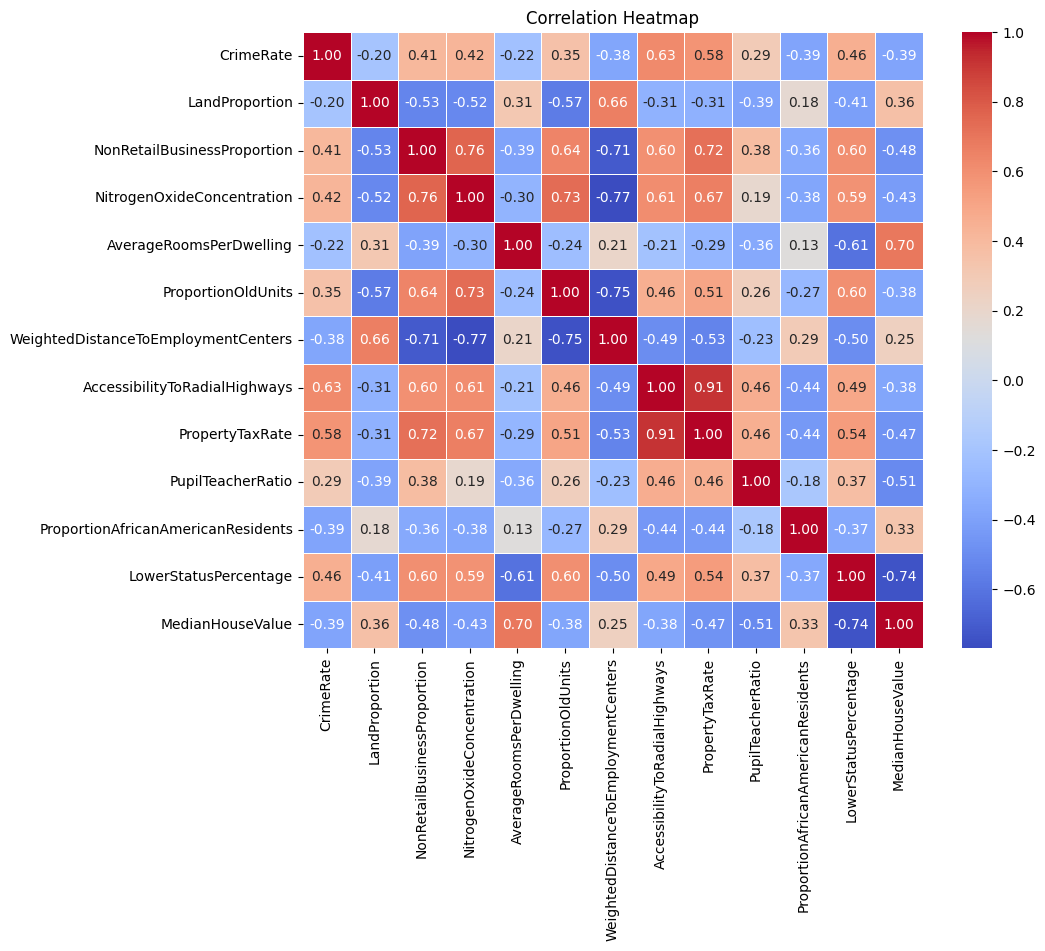

In [15]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#from pyspark.sql import SparkSession

# Create a SparkSession
#spark = SparkSession.builder.appName("correlation_finding").getOrCreate()

#file_path = "/content/BostonHousing.csv"
#df = spark.read.format("csv").options(header="true", inferSchema="true").load(file_path)

# Rename the columns
#df = df.withColumnRenamed("crim", "CrimeRate") \
#       .withColumnRenamed("zn", "LandProportion") \
#       .withColumnRenamed("indus", "NonRetailBusinessProportion") \
#       .withColumnRenamed("chas", "IsNearCharlesRiver") \
#       .withColumnRenamed("nox", "NitrogenOxideConcentration") \
#       .withColumnRenamed("rm", "AverageRoomsPerDwelling") \
#       .withColumnRenamed("age", "ProportionOldUnits") \
#       .withColumnRenamed("dis", "WeightedDistanceToEmploymentCenters") \
#       .withColumnRenamed("rad", "AccessibilityToRadialHighways") \
#       .withColumnRenamed("tax", "PropertyTaxRate") \
#       .withColumnRenamed("ptratio", "PupilTeacherRatio") \
#       .withColumnRenamed("b", "ProportionAfricanAmericanResidents") \
#       .withColumnRenamed("lstat", "LowerStatusPercentage") \
#       .withColumnRenamed("medv", "MedianHouseValue")


# List of numeric column names to compute correlation for
numeric_columns = ["CrimeRate", "LandProportion", "NonRetailBusinessProportion", "NitrogenOxideConcentration", "AverageRoomsPerDwelling",
                   "ProportionOldUnits", "WeightedDistanceToEmploymentCenters", "AccessibilityToRadialHighways", "PropertyTaxRate",
                   "PupilTeacherRatio", "ProportionAfricanAmericanResidents", "LowerStatusPercentage", "MedianHouseValue"]

# Check if the outputCol name "correlation_features" already exists in the DataFrame
if "correlation_features" not in df.columns:
    # Create a VectorAssembler to assemble all numeric columns into a single vector column
    assembler = VectorAssembler(inputCols=numeric_columns, outputCol="correlation_features")

    # Transform the DataFrame to include the vector column
    df = assembler.transform(df)

# Calculate the correlation matrix
correlation_matrix = Correlation.corr(df, "correlation_features", method="pearson").collect()[0][0]


# Convert the correlation matrix (DenseMatrix) to a Pandas DataFrame
corr_df = pd.DataFrame(correlation_matrix.toArray(), columns=numeric_columns, index=numeric_columns)

# Create a correlation heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [16]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# List of numeric column names to compute correlation for
numeric_columns = ["CrimeRate", "LandProportion", "NonRetailBusinessProportion", "NitrogenOxideConcentration", "AverageRoomsPerDwelling",
                   "ProportionOldUnits", "WeightedDistanceToEmploymentCenters", "AccessibilityToRadialHighways", "PropertyTaxRate",
                   "PupilTeacherRatio", "ProportionAfricanAmericanResidents", "LowerStatusPercentage", "MedianHouseValue"]

# Check if the "features" column already exists in the DataFrame
if "features" not in df.columns:
    # Create a VectorAssembler to assemble all numeric columns into a single vector column
    assembler = VectorAssembler(inputCols=numeric_columns, outputCol="features")

    # Transform the DataFrame to include the vector column
    df = assembler.transform(df)

df.printSchema()
print("Number of rows in df:", df.count())
print("Before Correlation.corr operation")

# Check if the Spark session is active (not stopped)
if not spark._sc._jsc.sc().isStopped():
    # Calculate the correlation matrix
    correlation_matrix = Correlation.corr(df, "features").head()
    print("After Correlation.corr operation")

    # Extract the correlation matrix as a NumPy array
    corr_matrix = correlation_matrix[0].toArray()

    # Display the correlation matrix
    for i, col in enumerate(numeric_columns):
        for j in range(i, len(numeric_columns)):
            print(f"Correlation between '{col}' and '{numeric_columns[j]}': {corr_matrix[i, j]}")
else:
    print("Spark session is stopped.")


root
 |-- CrimeRate: double (nullable = true)
 |-- LandProportion: double (nullable = true)
 |-- NonRetailBusinessProportion: double (nullable = true)
 |-- IsNearCharlesRiver: integer (nullable = true)
 |-- NitrogenOxideConcentration: double (nullable = true)
 |-- AverageRoomsPerDwelling: double (nullable = true)
 |-- ProportionOldUnits: double (nullable = true)
 |-- WeightedDistanceToEmploymentCenters: double (nullable = true)
 |-- AccessibilityToRadialHighways: integer (nullable = true)
 |-- PropertyTaxRate: integer (nullable = true)
 |-- PupilTeacherRatio: double (nullable = true)
 |-- ProportionAfricanAmericanResidents: double (nullable = true)
 |-- LowerStatusPercentage: double (nullable = true)
 |-- MedianHouseValue: double (nullable = true)
 |-- correlation_features: vector (nullable = true)
 |-- features: vector (nullable = true)

Number of rows in df: 506
Before Correlation.corr operation
After Correlation.corr operation
Correlation between 'CrimeRate' and 'CrimeRate': 1.0
Cor

In [20]:
from pyspark.sql.functions import corr

# Calculate the correlation between "LowerStatusPercentage" and "NitrogenOxideConcentration"
correlation = df.stat.corr("LowerStatusPercentage", "NitrogenOxideConcentration")

# Display the correlation coefficient
print(f"Correlation between 'LowerStatusPercentage' and 'NitrogenOxideConcentration': {correlation}")


Correlation between 'LowerStatusPercentage' and 'NitrogenOxideConcentration': 0.5908789208808454


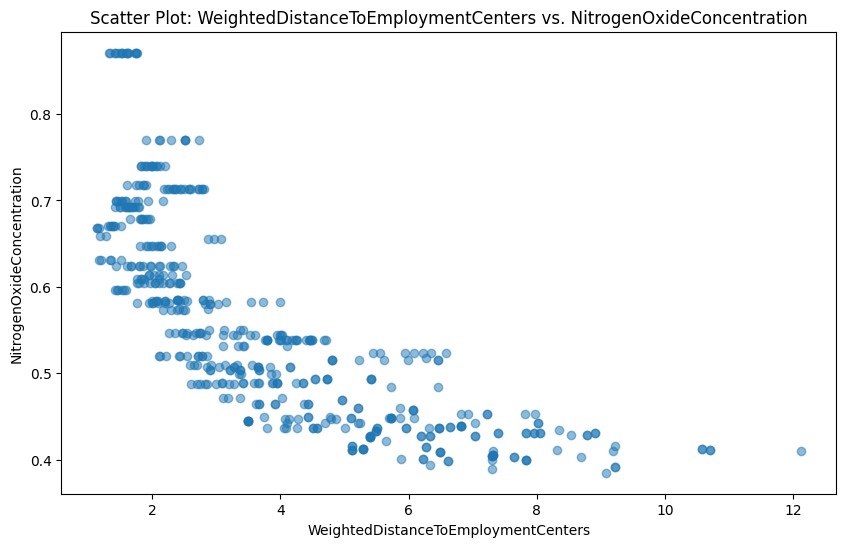

In [17]:
import matplotlib.pyplot as plt

# Extract "WeightedDistanceToEmploymentCenters" and "NitrogenOxideConcentration" columns and convert them to Pandas DataFrame for plotting
scatter_data = df.select("WeightedDistanceToEmploymentCenters", "NitrogenOxideConcentration").toPandas()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(scatter_data["WeightedDistanceToEmploymentCenters"], scatter_data["NitrogenOxideConcentration"], alpha=0.5)
plt.title("Scatter Plot: WeightedDistanceToEmploymentCenters vs. NitrogenOxideConcentration")
plt.xlabel("WeightedDistanceToEmploymentCenters")
plt.ylabel("NitrogenOxideConcentration")
plt.show()


# **Creating bins based on the average number of rooms ("RM")**

The number of bins in our output starting from 0 and ending at 5 is because of the way we calculated the bin index for each record using the expression ((col("rm") - min_rm) / bin_size).cast("int"). In this expression, we are using integer casting, which rounds down the values to the nearest integer.

So, if the bin index calculation results in values like 0.0 to 0.99999, they will all be cast to 0. Similarly, values between 1.0 to 1.99999 will be cast to 1, and so on.

In [18]:
from pyspark.sql.functions import col

# Create a SparkSession
# spark = SparkSession.builder.appName("BostonHousingAnalysis").getOrCreate()

# Load the Boston Housing dataset
# df = spark.read.csv("/content/BostonHousing.csv", header=True, inferSchema=True)

# Calculate the minimum and maximum "RM" values for the entire DataFrame
min_rm = df.agg({"AverageRoomsPerDwelling": "min"}).collect()[0][0]
max_rm = df.agg({"AverageRoomsPerDwelling": "max"}).collect()[0][0]

# Number of bins
num_bins = 5

# Calculate bin size
bin_size = (max_rm - min_rm) / num_bins

# Print the values of min_rm and bin_size to verify they are numeric
print("min_rm:", min_rm)
print("bin_size:", bin_size)

# Calculate the bin index for each record
df = df.withColumn("bins", ((col("AverageRoomsPerDwelling") - min_rm) / bin_size).cast("int"))

# Group by the bin and calculate statistics
bin_stats = df.groupBy("bins").agg(
    {"PropertyTaxRate": "avg", "MedianHouseValue": "avg", "AverageRoomsPerDwelling": "avg", "ProportionOldUnits": "avg", "CrimeRate": "avg"}
).withColumnRenamed("avg(PropertyTaxRate)", "avg_tax").withColumnRenamed("avg(MedianHouseValue)", "avg_medv").withColumnRenamed("avg(AverageRoomsPerDwelling)", "avg_rm").withColumnRenamed("avg(ProportionOldUnits)", "avg_age").withColumnRenamed("avg(CrimeRate)", "avg_crim").orderBy("bins")

# Show the results
bin_stats.show()


min_rm: 3.561
bin_size: 1.0437999999999998
+----+-----------------+------------------+-----------------+-------------------+------------------+
|bins|          avg_age|           avg_tax|           avg_rm|           avg_crim|          avg_medv|
+----+-----------------+------------------+-----------------+-------------------+------------------+
|   0|96.51666666666665|             666.0|4.097833333333333| 20.520578333333333|15.350000000000001|
|   1|88.35084745762713|  495.728813559322|5.349389830508475| 7.2335296610169495| 15.86779661016949|
|   2|67.75670731707315|  410.015243902439|6.159429878048779|  3.148637560975608|20.151829268292698|
|   3| 57.4747252747253| 354.4175824175824|7.037164835164835| 2.5527067032967032|30.345054945054947|
|   4|65.22857142857144|281.95238095238096|8.112809523809526|0.47702333333333347| 46.67619047619047|
|   5|             82.9|             666.0|             8.78|            3.47428|              21.9|
+----+-----------------+------------------+-----

min_rm: 3.561
bin_size: 1.0437999999999998
+----+-----------------+------------------+-----------------+-------------------+------------------+
|bins|          avg_age|           avg_tax|           avg_rm|           avg_crim|          avg_medv|
+----+-----------------+------------------+-----------------+-------------------+------------------+
|   0|96.51666666666665|             666.0|4.097833333333333| 20.520578333333333|15.350000000000001|
|   1|88.35084745762713|  495.728813559322|5.349389830508475| 7.2335296610169495| 15.86779661016949|
|   2|67.75670731707315|  410.015243902439|6.159429878048779|  3.148637560975608|20.151829268292698|
|   3| 57.4747252747253| 354.4175824175824|7.037164835164835| 2.5527067032967032|30.345054945054947|
|   4|65.22857142857144|281.95238095238096|8.112809523809526|0.47702333333333347| 46.67619047619047|
|   5|             82.9|             666.0|             8.78|            3.47428|              21.9|
+----+-----------------+------------------+-----

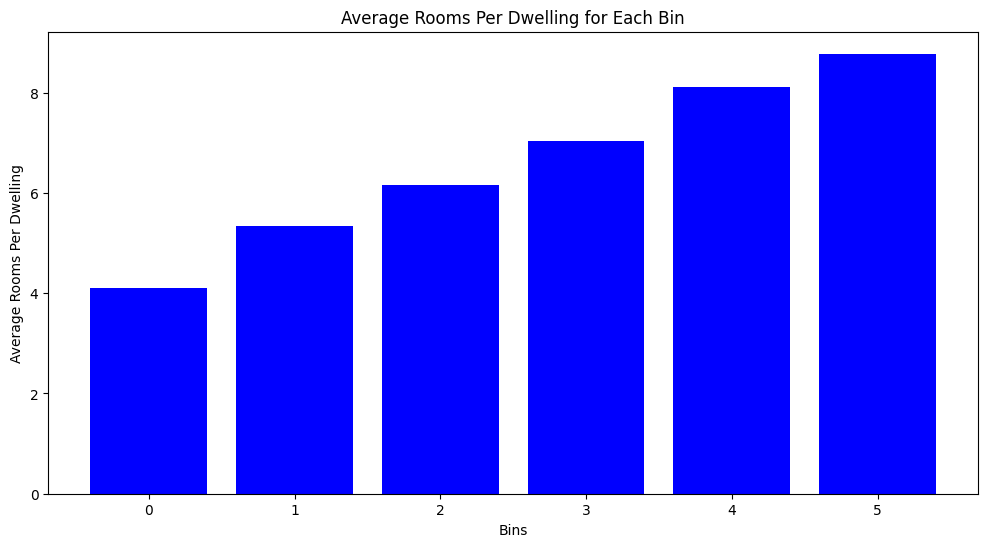

In [19]:
# from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import pandas as pd

# Create a SparkSession
# spark = SparkSession.builder.appName("BostonHousingAnalysis").getOrCreate()

# Load the Boston Housing dataset
# df = spark.read.csv("/content/BostonHousing.csv", header=True, inferSchema=True)

# Calculate the minimum and maximum "RM" values for the entire DataFrame
min_rm = df.agg({"AverageRoomsPerDwelling": "min"}).collect()[0][0]
max_rm = df.agg({"AverageRoomsPerDwelling": "max"}).collect()[0][0]

# Number of bins
num_bins = 5

# Calculate bin size
bin_size = (max_rm - min_rm) / num_bins

# Print the values of min_rm and bin_size to verify they are numeric
print("min_rm:", min_rm)
print("bin_size:", bin_size)

# Calculate the bin index for each record
df = df.withColumn("bins", ((col("AverageRoomsPerDwelling") - min_rm) / bin_size).cast("int"))

# Group by the bin and calculate statistics
bin_stats = df.groupBy("bins").agg(
    {"PropertyTaxRate": "avg", "MedianHouseValue": "avg", "AverageRoomsPerDwelling": "avg", "ProportionOldUnits": "avg", "CrimeRate": "avg"}
).withColumnRenamed("avg(PropertyTaxRate)", "avg_tax").withColumnRenamed("avg(MedianHouseValue)", "avg_medv").withColumnRenamed("avg(AverageRoomsPerDwelling)", "avg_rm").withColumnRenamed("avg(ProportionOldUnits)", "avg_age").withColumnRenamed("avg(CrimeRate)", "avg_crim").orderBy("bins")

# Show the results
bin_stats.show()

# Convert the result to a Pandas DataFrame for visualization
bin_stats_pd = bin_stats.toPandas()

# Plot the results
plt.figure(figsize=(12, 6))
plt.bar(bin_stats_pd["bins"], bin_stats_pd["avg_rm"], color='blue')
plt.xlabel("Bins")
plt.ylabel("Average Rooms Per Dwelling")
plt.title("Average Rooms Per Dwelling for Each Bin")
plt.show()


In [18]:
# Stop the SparkSession
spark.stop()